In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import time
import os

In [5]:
def initialize_matrix(n):
    M_n = np.arange(n*n).reshape((n, n))
    for i in range(0,n):
        for j in range(0,n): 
            M_n [i][j] =  np.random.randint(2)

    return M_n

In [6]:
def Evol_system(M_n):
    Vecinos = np.arange(8).reshape((1, 8))
    N = M_n

    for i in range(1, M_n.shape[0] - 1):
        for j in range(1, M_n.shape[0] - 1): 
            N[i][j] =  M_n[i][j]
  
            Vecinos = np.array([M_n[i-1][j-1], M_n[i-1][j], M_n[i-1][j+1], M_n[i][j-1], M_n[i][j+1], M_n[i+1][j-1], M_n[i+1][j], M_n[i+1][j+1]])
            k = np.count_nonzero(Vecinos==1)
      
            if M_n[i][j] == 0:
                if k==3:
                    N[i][j] = 1
                else:
                    N [i][j] = 0

            else:
                if k==2 or k==3:
                    N[i][j] = 1
                else:
                    N[i][j] = 0
      
        M_n = N

        return M_n

In [26]:
for h in range(1, 13):
    n = h * 5
    filename = "time_n=" + str(n) + ".txt"
    archivo = open(filename, "a")

    for p in range(0,20):
        M_n = initialize_matrix(h*5)
        k = [np.count_nonzero(M_n==1)]

        for i in range(0,9):
            M_n = Evol_system(M_n)
            k.append(np.count_nonzero(M_n == 1))

        tiempo_inicial=time.time()

        while(1):
            Evol_system(M_n)

            k[:-1] = k[1:]
            k[-1] = np.count_nonzero(M_n==1) 
      
      # condiciones de estabilidad por periodicidad
            condition_p1 = sum(k) == k[-1] * 10
            condition_p2 = sum([k[i] for i in range(0, len(k), 2)]) == k[-2] * 5 and sum([k[i] for i in range(1, len(k), 2)]) == k[-1] * 5 
            condition_p3 = sum([k[i] for i in range(0, len(k), 3)]) == k[-1] * 4 and sum([k[i] for i in range(1, len(k), 3)]) == k[-3] * 3 and sum([k[i] for i in range(2, len(k), 3)]) == k[-2] * 3  
            condition_p4 = sum([k[i] for i in range(0, len(k), 4)]) == k[-2] * 3 and sum([k[i] for i in range(1, len(k), 4)]) == k[-1] * 3 and sum([k[i] for i in range(2, len(k), 4)]) == k[-4] * 2 and sum([k[i] for i in range(2, len(k), 4)]) == k[-3] * 2  
            condition_p2_double = sum([k[i] for i in range(0, len(k), 2)]) == (3 * k[-1] + 2 * k[-3])
            condition_p3_double = sum([k[i] for i in range(0, len(k), 3)]) == (2 * k[-2] + 2 * k[-1]) and sum([k[i] for i in range(1, len(k), 3)]) == (2 * k[-2] + k[-1]) 

              #si alguna condicion se estabilidad se cumple se para el ciclo
            if condition_p1 or condition_p2 or condition_p3 or condition_p4 or condition_p2_double or condition_p3_double:
                break

        archivo.write(str(time.time()-tiempo_inicial) + '\n')

    archivo.close()

In [27]:
#Máximo valor para n=5
x1= np.loadtxt('time_n=5.txt', unpack=True)
np.max(x1)

0.0006458759307861328

In [50]:
#Máximo valor para n=10
x2= np.loadtxt('time_n=10.txt', unpack=True)
np.max(x2)

0.011993169784545898

In [51]:
#Máximo valor para n=15
x3= np.loadtxt('time_n=15.txt', unpack=True)
np.max(x3)

0.110321044921875

In [52]:
#Máximo valor para n=20
x4= np.loadtxt('time_n=20.txt', unpack=True)
np.max(x4)

0.26677465438842773

In [53]:
#Máximo valor para n=25
x5= np.loadtxt('time_n=25.txt', unpack=True)
np.max(x5)

0.5622007846832275

In [54]:
#Máximo valor para n=30
x6= np.loadtxt('time_n=30.txt', unpack=True)
np.max(x6)

1.676619052886963

In [55]:
#Máximo valor para n=35
x7= np.loadtxt('time_n=35.txt', unpack=True)
np.max(x7)

2.8641598224639893

In [56]:
#Máximo valor para n=40
x8= np.loadtxt('time_n=40.txt', unpack=True)
np.max(x8)

2.4468438625335693

In [57]:
#Máximo valor para n=45
x9= np.loadtxt('time_n=45.txt', unpack=True)
np.max(x9)

2.8154351711273193

In [58]:
#Máximo valor para n=50
x10= np.loadtxt('time_n=50.txt', unpack=True)
np.max(x10)

13.088721990585327

In [59]:
#Máximo valor para n=55
x11= np.loadtxt('time_n=55.txt', unpack=True)
np.max(x11)

7.316617965698242

In [60]:
#Máximo valor para n=60
x12= np.loadtxt('time_n=60.txt', unpack=True)
np.max(x12)

0.0016298294067382812

In [61]:
Y=np.linspace(1.,20.,20)

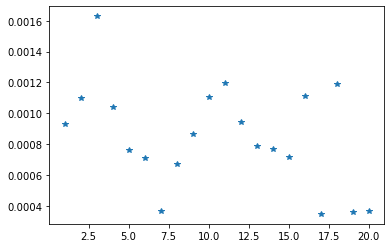

In [64]:
plt.plot(Y,x1,"*")

In [66]:
np.mean(x1)

0.0008481621742248535